# HOURSE PRICE PREDICTION USING_LINEAR_REGRESSION

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#Import_Libraries_And_Desciptive_Statictis">Import Libraries And Desciptive Statictis</a></li>
        <li><a href="https://#Explore_Data_Analysis">Explore Data Analysis</a></li>
        <li><a href="https://#Data_Processing">Data_Processing</a></li>
        <li><a href="https://#modeling">Modeling</a></li>
        <li><a href="https://#prediction">Prediction</a></li>
        <li><a href="https://#evaluation">Evaluation</a></li>
    </ol>
</div>
<br>
<hr>


<h2>1. Import Libraries And Desciptive Statictis</h2>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing=pd.read_csv("/kaggle/input/housing-data/housing.csv")

In [3]:
# Checking the first columns
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Descriptive Statictis Analysis**

In [4]:
# Statistic Analysis
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [5]:
# Delete NA in DataFrame
housing.dropna(inplace=True)
housing.tail(5).transpose()

,20635,20636,20637,20638,20639
longitude,-121.09,-121.21,-121.22,-121.32,-121.24
latitude,39.48,39.49,39.43,39.43,39.37
housing_median_age,25.0,18.0,17.0,18.0,16.0
total_rooms,1665.0,697.0,2254.0,1860.0,2785.0
total_bedrooms,374.0,150.0,485.0,409.0,616.0
population,845.0,356.0,1007.0,741.0,1387.0
households,330.0,114.0,433.0,349.0,530.0
median_income,1.5603,2.5568,1.7,1.8672,2.3886
median_house_value,78100.0,77100.0,92300.0,84700.0,89400.0
ocean_proximity,INLAND,INLAND,INLAND,INLAND,INLAND


In [6]:
# Check Type Of DataFrame
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


- DataFrame has no null value
- There are 10 columns
- 9 columns of type float
- There are 20640 rows

## 2. Explore Data Analysis

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

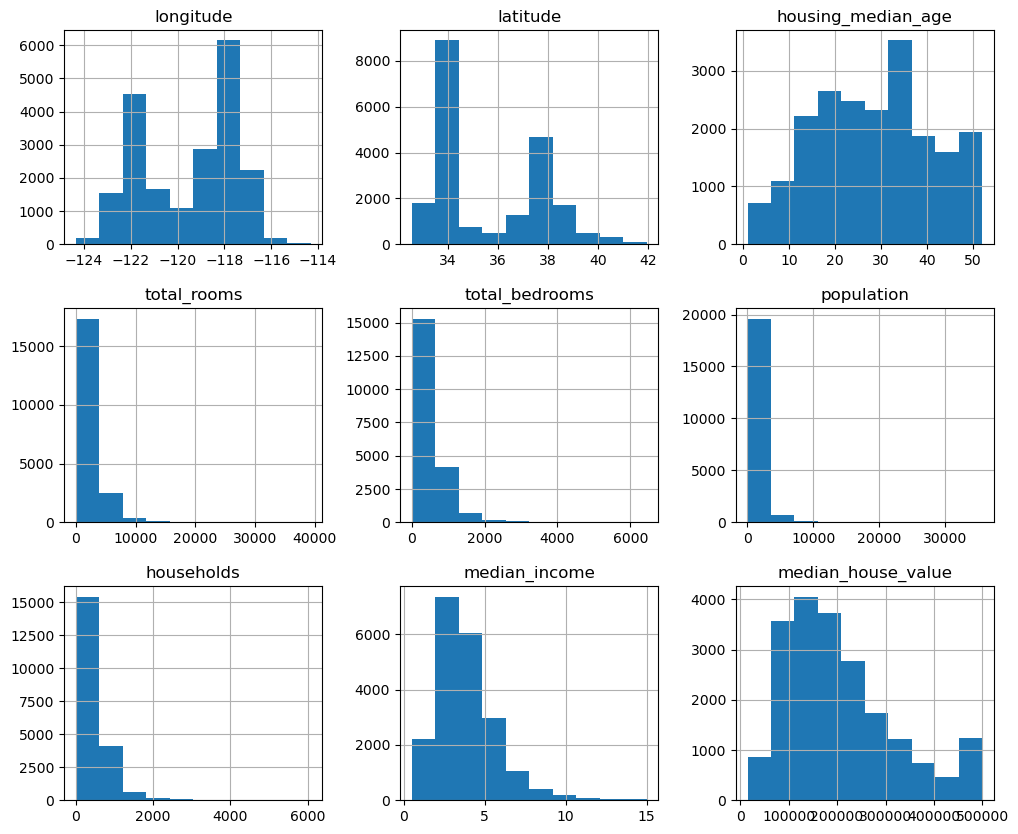

In [7]:
## Checking the distribution of numerical variables
housing.hist(figsize=(12,10))

In [8]:
## Check the interaction between variables
## Covariance matrix
hm=housing.corr()
hm

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [9]:
# Column Name
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Figure size 1200x700 with 0 Axes>

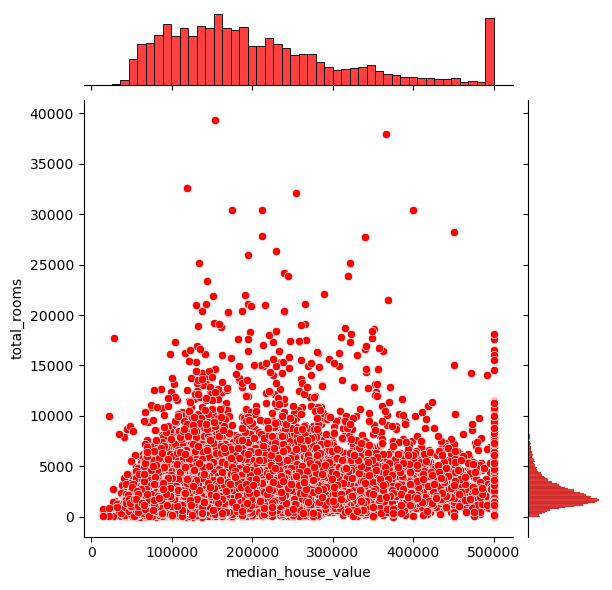

In [10]:
# Distribution between housing_median_age with total_rooms
plt.figure(figsize=(12,7))
sns.jointplot(x="median_house_value",y="total_rooms",data=housing,color="red")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'The graph shows the distribution of (median_house_value)')

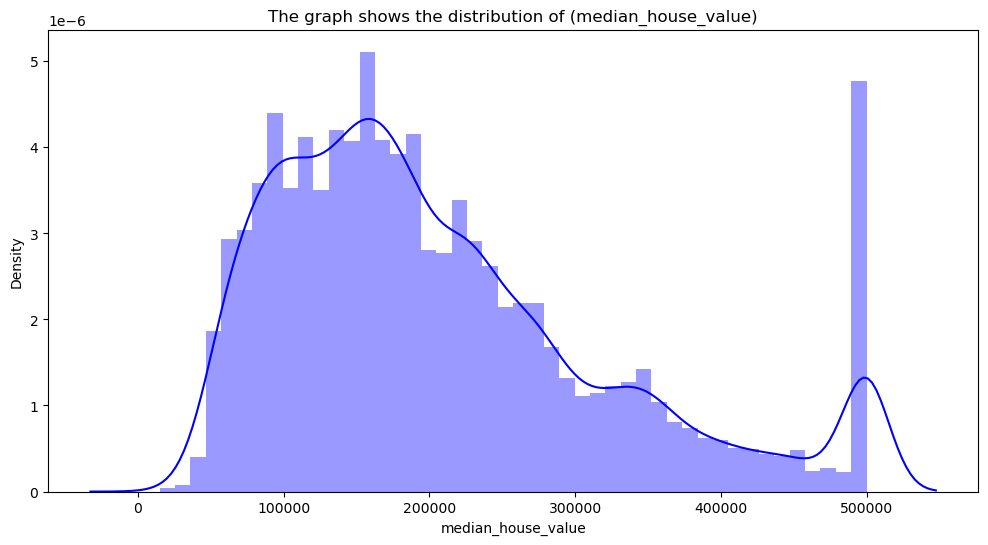

In [11]:
## Distribution of (median_house_value")
plt.figure(figsize=(12,6))
sns.distplot(housing['median_house_value'],color="blue")
plt.title("The graph shows the distribution of (median_house_value)")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'The graph shows the distribution of (population)')

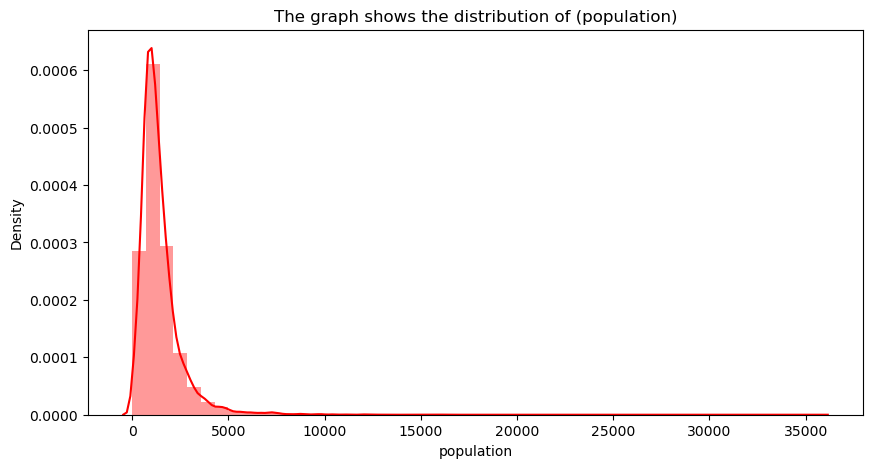

In [12]:
## Distribution of (popurlation)
plt.figure(figsize=(10,5))
sns.distplot(housing['population'],color='red')
plt.title("The graph shows the distribution of (population)")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'The graph shows the distribution of (median_income)')

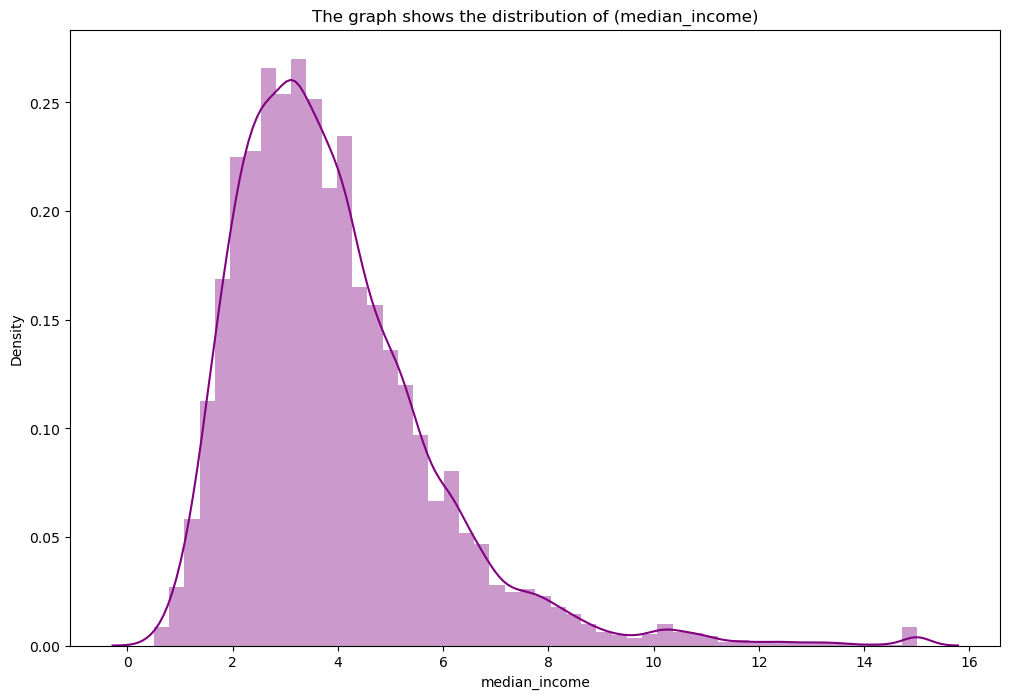

In [13]:
# The distribution of (mean_income)
plt.figure(figsize=(12,8))
sns.distplot(housing['median_income'],color='purple')
plt.title("The graph shows the distribution of (median_income)")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

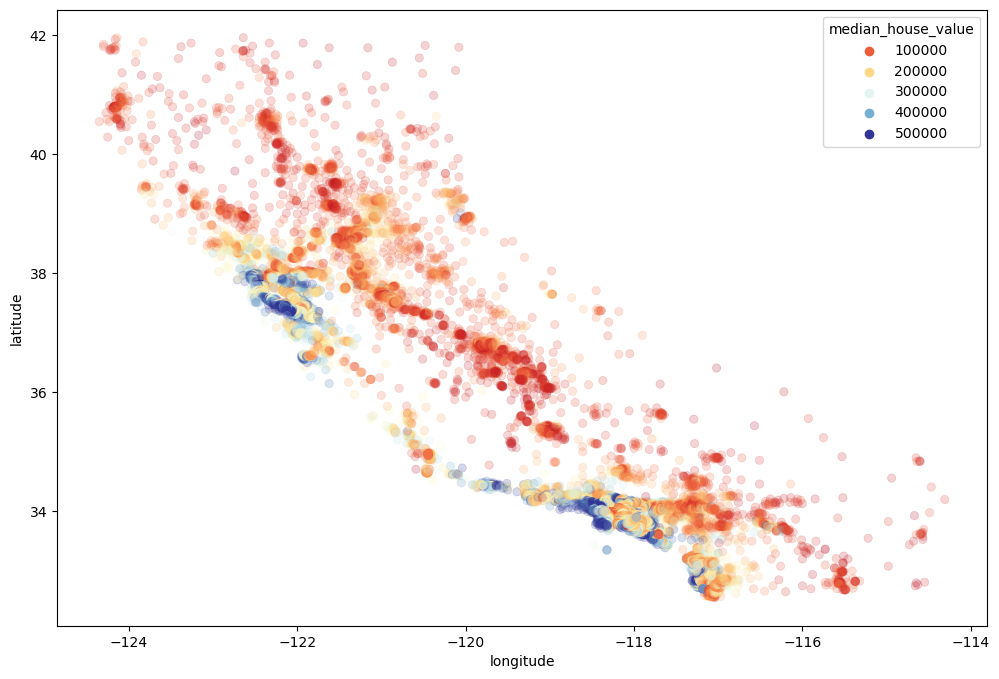

In [14]:
# Distribution of house prices by latitude and longitude
plt.figure(figsize=(12,8))
sns.scatterplot(x='longitude',y='latitude',data=housing,
               hue="median_house_value",edgecolor=None,
               alpha=0.2,palette='RdYlBu')

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

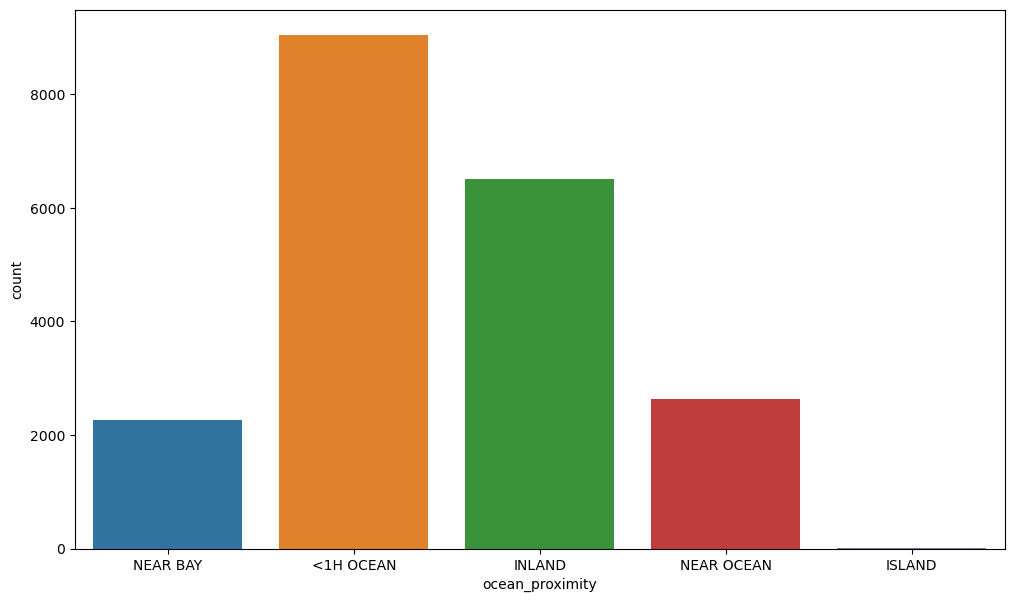

In [15]:
# Count number of columns ["ocean_proximity"]
plt.figure(figsize=(12,7))
sns.countplot(x=housing['ocean_proximity'])

<Figure size 1200x700 with 0 Axes>

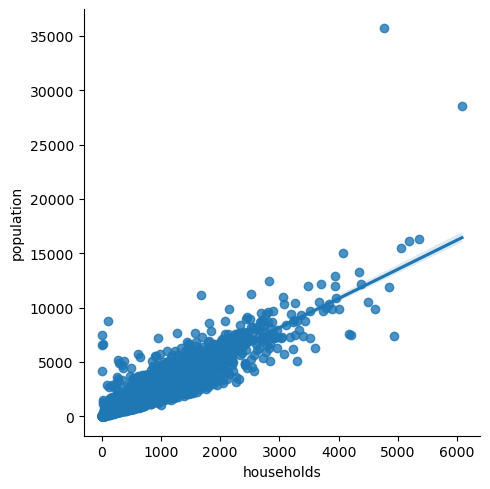

In [16]:
## concentration of population and households
plt.figure(figsize=(12,7))
sns.lmplot(data=housing,x='households',y='population',palette='Set2')

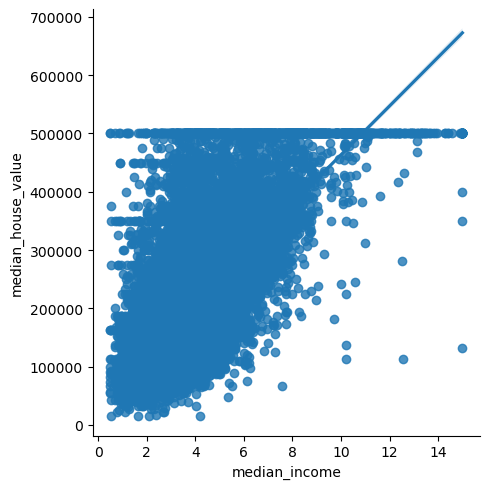

In [17]:
#concentration of median_income and median_income
sns.lmplot(data=housing,x='median_income',y='median_house_value',palette="Set2")

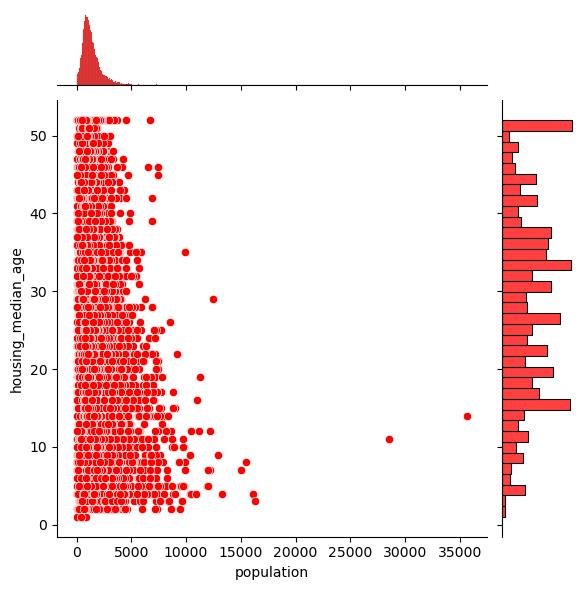

In [18]:
#The relationship of population and households
sns.jointplot(data=housing,x='population',y='housing_median_age',color="red")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'The graph shows the distibution of (population)')

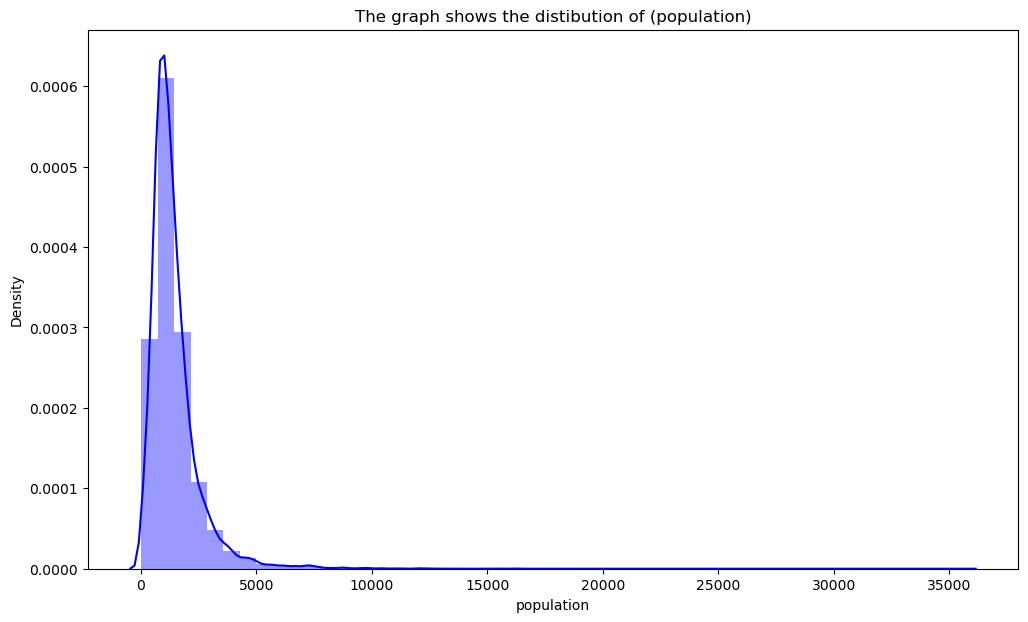

In [19]:
# Distribution of population
plt.figure(figsize=(12,7))
sns.distplot(housing['population'],color="blue")
plt.title("The graph shows the distibution of (population)")

<AxesSubplot:>

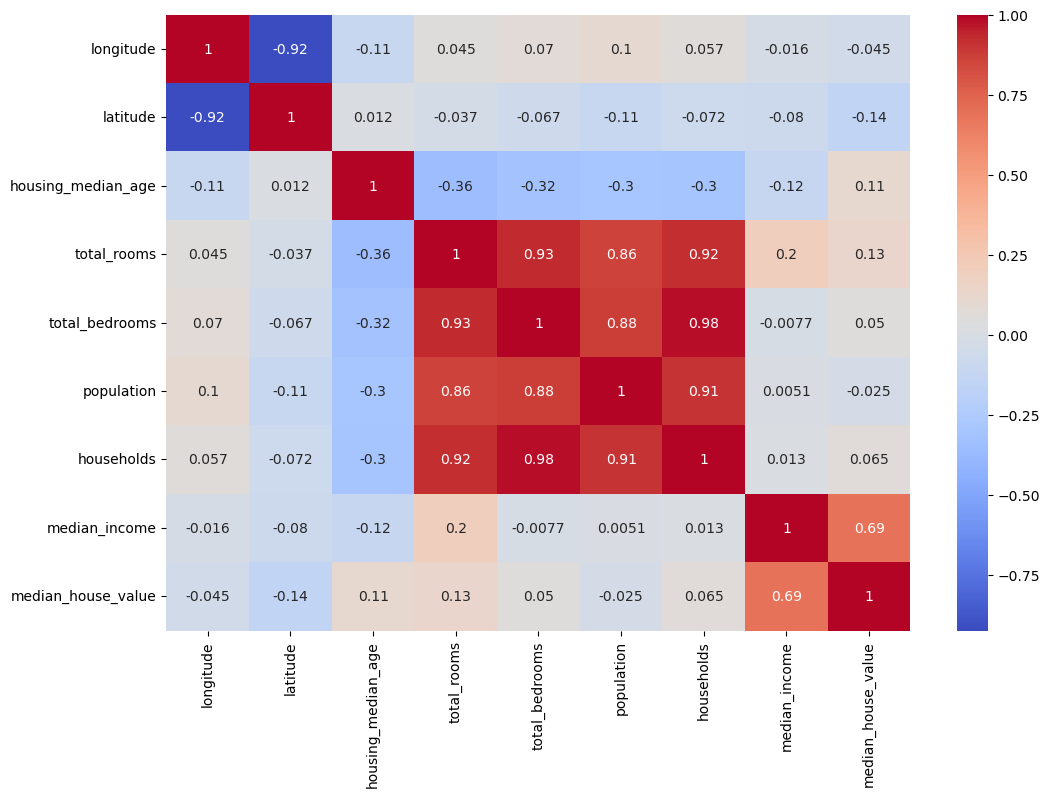

In [20]:
hm=housing.corr()
plt.figure(figsize=(12,8))
sns.heatmap(hm,annot=True,cmap="coolwarm")

In [21]:
## Check correlation by median_house_value
housing.corr()['median_house_value'].sort_values()

latitude             -0.144638
longitude            -0.045398
population           -0.025300
total_bedrooms        0.049686
households            0.064894
housing_median_age    0.106432
total_rooms           0.133294
median_income         0.688355
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [22]:
housing.sort_values("median_house_value",ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8852,-118.42,34.08,48.0,2413.0,261.0,770.0,248.0,15.0001,500001.0,<1H OCEAN
10454,-117.66,33.48,22.0,809.0,180.0,334.0,157.0,2.3846,500001.0,<1H OCEAN
5487,-118.50,33.97,29.0,2737.0,808.0,1157.0,696.0,5.1280,500001.0,<1H OCEAN
16020,-122.47,37.73,50.0,1653.0,252.0,641.0,224.0,10.6605,500001.0,NEAR OCEAN
16019,-122.47,37.73,52.0,2151.0,280.0,762.0,274.0,10.7309,500001.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
5887,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN
9188,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
2799,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND
19802,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND


In [23]:
housing['total_rooms']=np.log(housing['total_rooms']+1)
housing['total_bedrooms']=np.log(housing['total_bedrooms']+1)
housing['population']=np.log(housing['population']+1)
housing['households']=np.log(housing['households']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

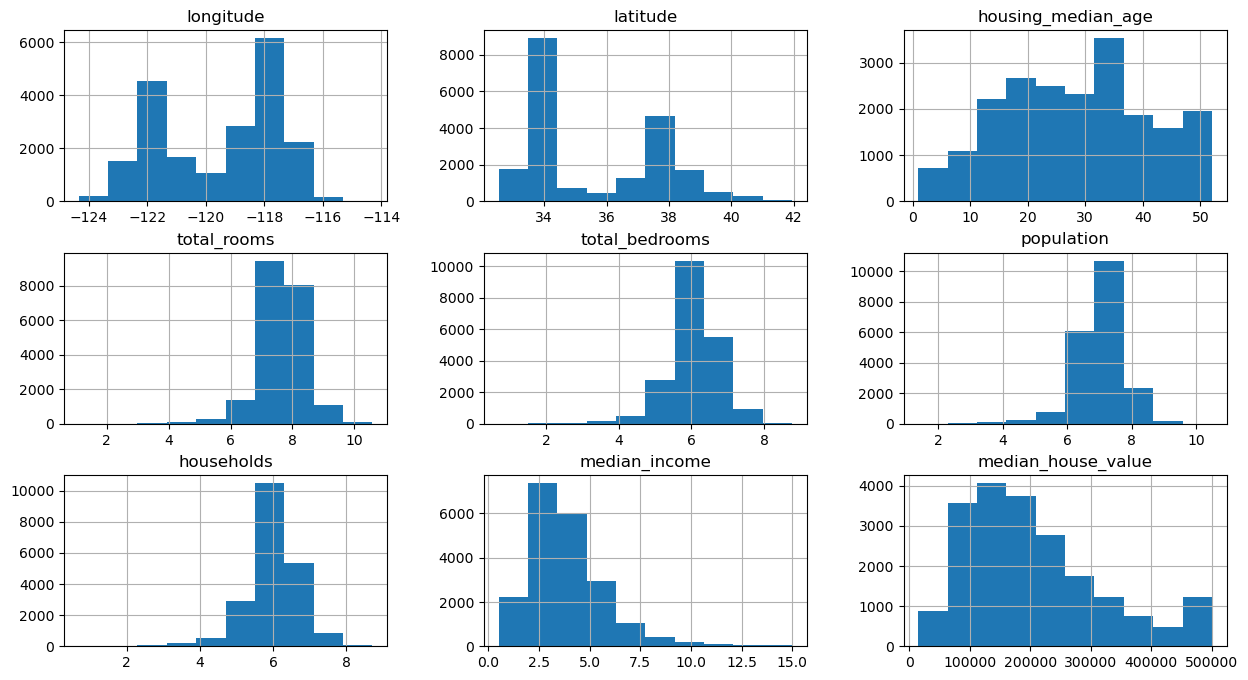

In [24]:
housing.hist(figsize=(15,8))

In [25]:
# Count values type of ocean_proximity
housing.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

## 4. Modeling

In [26]:
# Create dumies
housing=housing.join(pd.get_dummies(housing.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [27]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0


<AxesSubplot:>

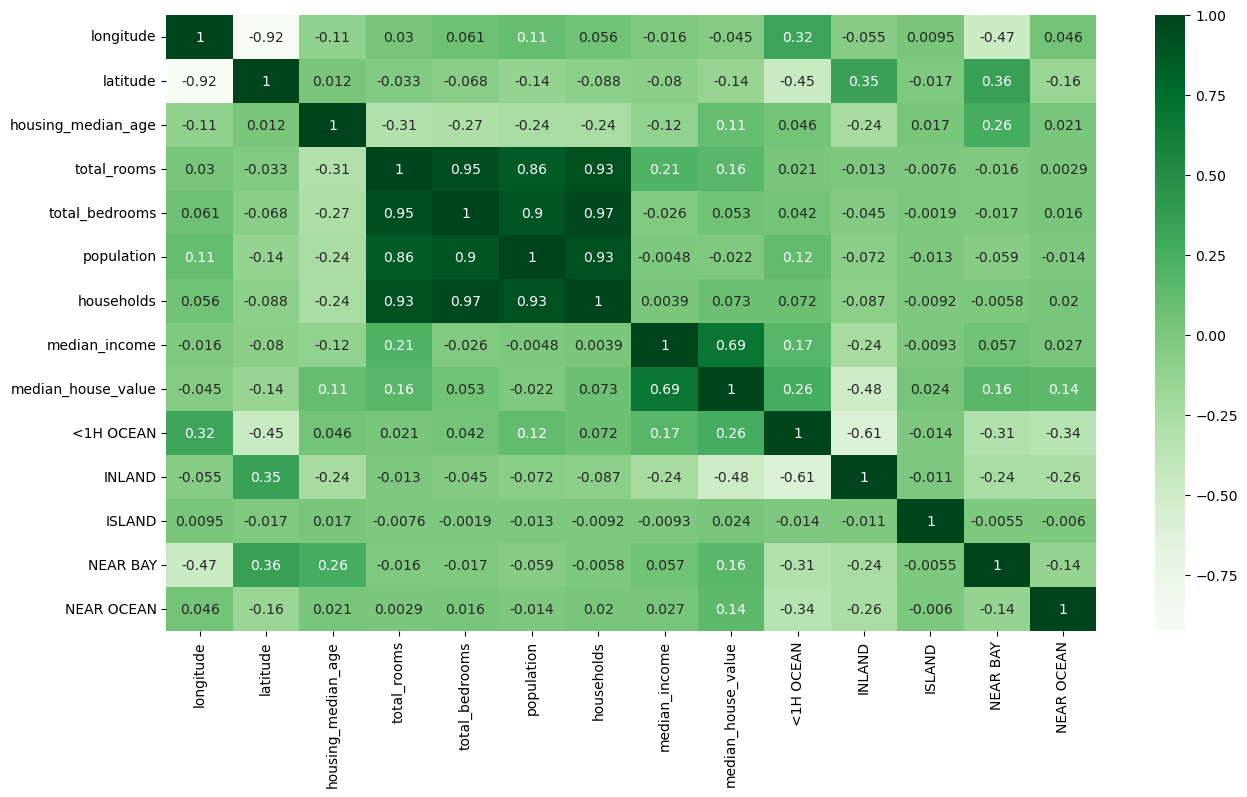

In [28]:
hm=housing.corr()
plt.figure(figsize=(15,8))
sns.heatmap(hm,annot=True,cmap="Greens")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

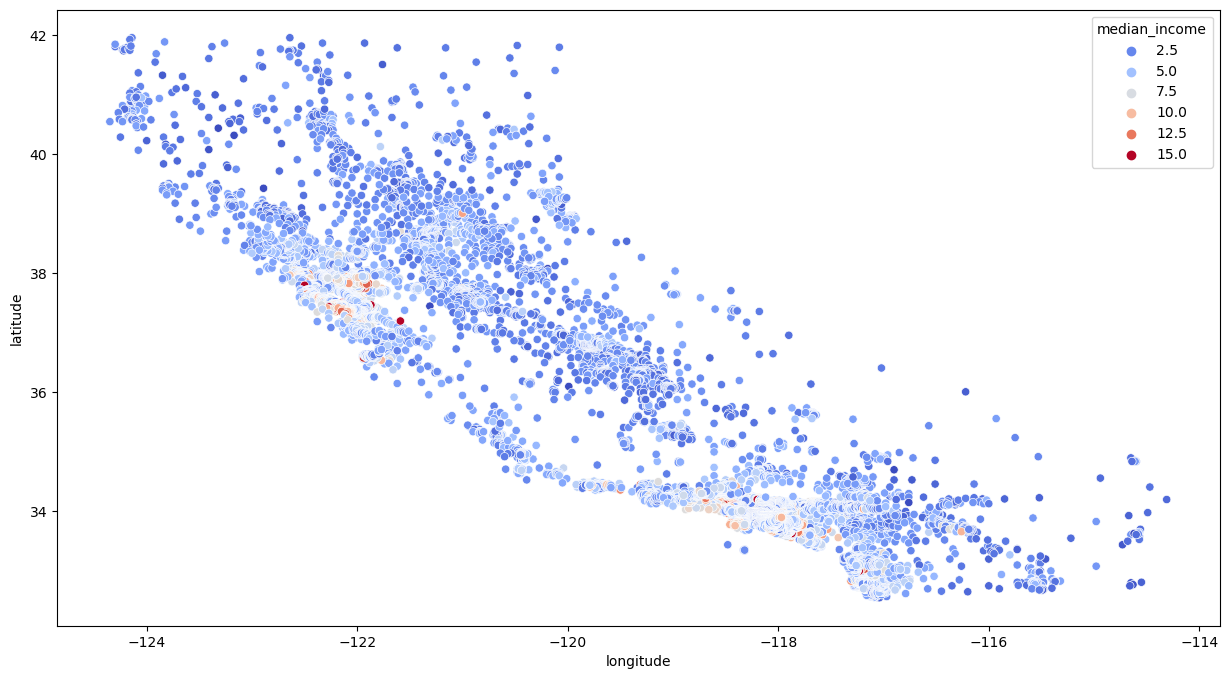

In [29]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="longitude",y='latitude',data=housing,hue="median_income",palette="coolwarm")

**Feature Egineering**

In [30]:
housing['bedroom_ratio']=housing['total_bedrooms']/housing['total_rooms']
housing['household_room']=housing['total_bedrooms']/housing['households']

<AxesSubplot:>

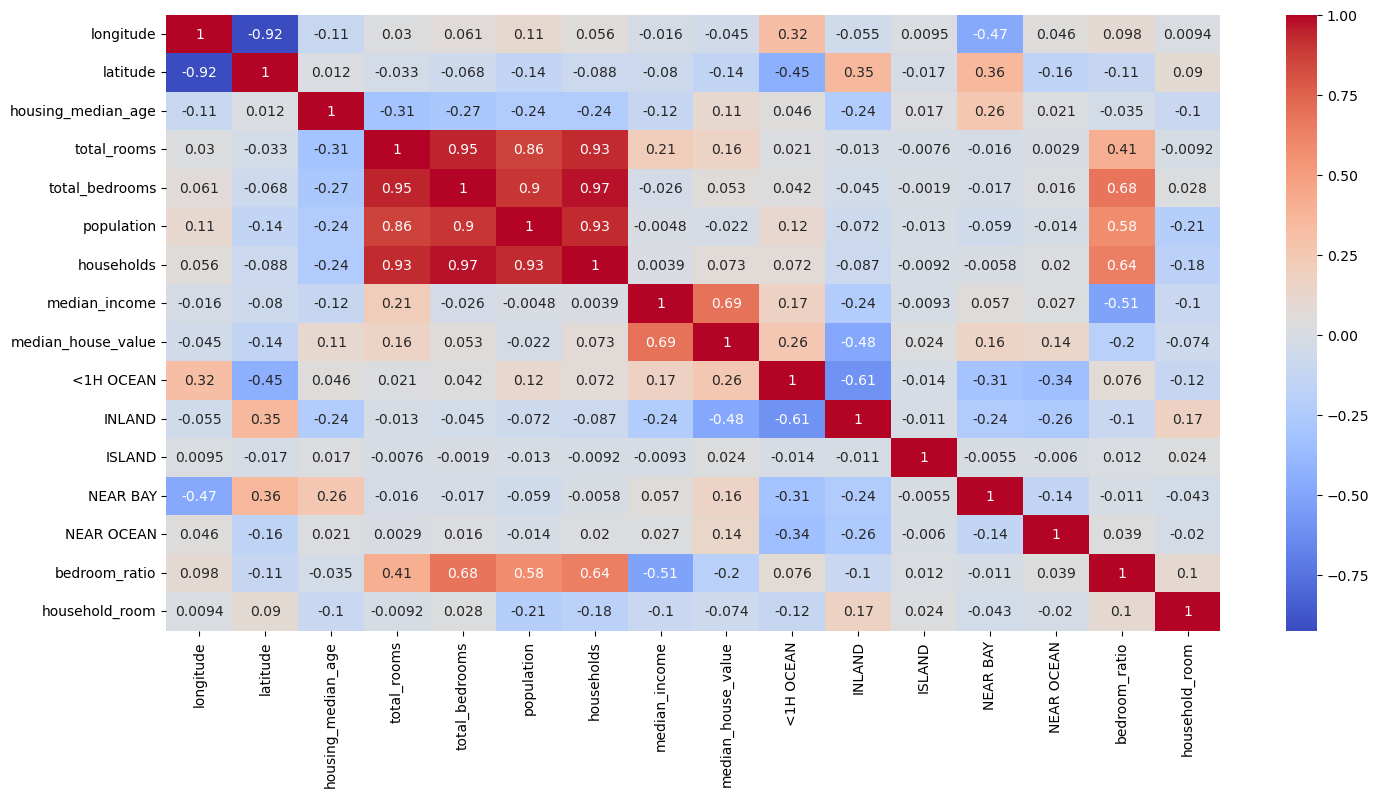

In [31]:
hm=housing.corr()
plt.figure(figsize=(17,8))
sns.heatmap(hm,annot=True,cmap="coolwarm")

## 5.Prediction

In [32]:
from sklearn.model_selection import train_test_split
X=housing.drop(['median_house_value'],axis=1)
y=housing["median_house_value"]

In [33]:
X.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_room
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,0,0,0,1,0,0.717813,1.004820
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,0,0,0,1,0,0.790429,0.995951
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,0,0,0,1,0,0.720313,1.013603
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,0,0,0,1,0,0.764097,1.013016
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,0,0,0,1,0,0.762444,1.013968


In [34]:
y.head(5)

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm=LinearRegression()

In [38]:
lm.fit(X_train,y_train)

LinearRegression()

In [39]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_room
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0,0.717813,1.004820
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0,0.790429,0.995951
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0,0.720313,1.013603
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0,0.764097,1.013016
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0,0.762444,1.013968


In [40]:
# coefficient
print(lm.intercept_)

-1931586.1716040422


In [41]:
lm.coef_

array([ -29825.97921494,  -28666.95871   ,    1044.40462647,
       -104544.82467203,  180148.46335712,  -89239.91719637,
         35672.61432056,   42730.13467321,  -31934.20712465,
        -63459.35331897,  165030.80124018,  -38850.7363383 ,
        -30786.50445826, -514355.42101105,  -31019.64592923])

In [42]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'bedroom_ratio', 'household_room'],
      dtype='object')

In [43]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
longitude,-29825.979215
latitude,-28666.958710
housing_median_age,1044.404626
total_rooms,-104544.824672
total_bedrooms,180148.463357
population,-89239.917196
households,35672.614321
median_income,42730.134673
<1H OCEAN,-31934.207125
INLAND,-63459.353319


**Prediction**

In [44]:
predictions=lm.predict(X_test)

In [45]:
predictions

array([277246.48175548, 327109.54821692, 157636.18755271, ...,
         8403.29870303, 170920.6795466 , 291680.84974622])

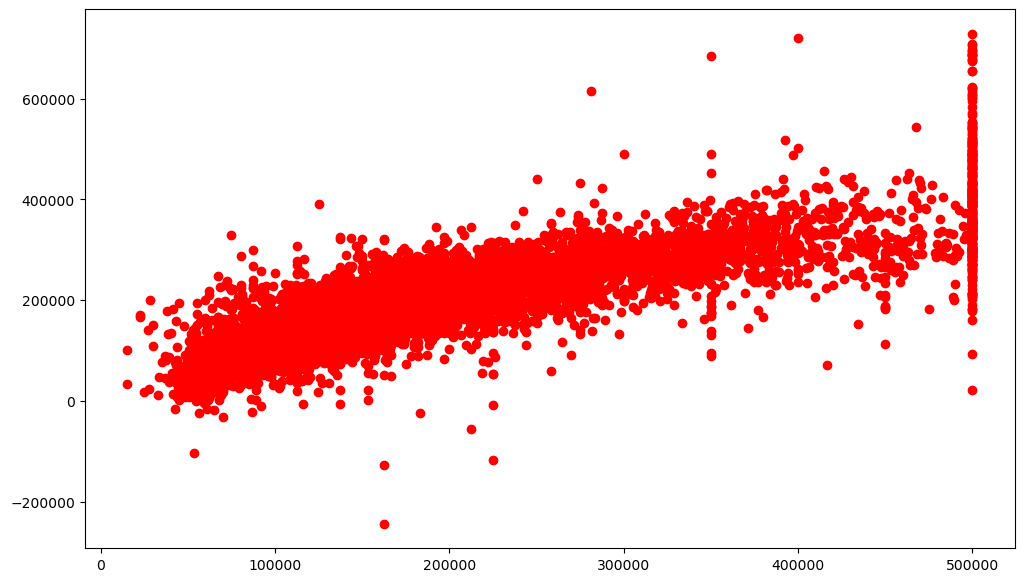

In [46]:
plt.figure(figsize=(12,7))
plt.scatter(y_test,predictions,color="red")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

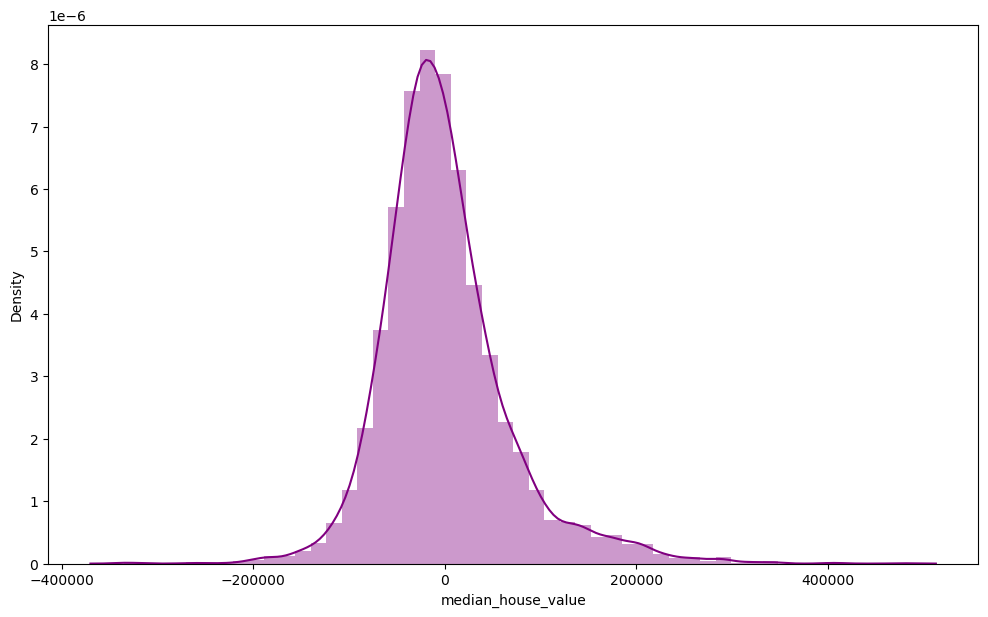

In [47]:
## distibution y_test-predictions
plt.figure(figsize=(12,7))
sns.distplot((y_test-predictions),color="purple")

In [48]:
y_test

14561    237300.0
1571     386600.0
4201     176700.0
4670     250000.0
6251     163300.0
           ...   
18992    298400.0
12312    115300.0
19871     50600.0
7331     165400.0
15731    471400.0
Name: median_house_value, Length: 6743, dtype: float64

# 6. Evaluation Model

In [49]:
from sklearn import metrics

In [50]:
metrics.mean_absolute_error(y_test,predictions)

48233.47587713671

In [51]:
metrics.mean_squared_error(y_test,predictions)

4504741309.258679

In [52]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

67117.36965390315